# Tutorial 7: node_link_demand_multimodal
This dataset illustrates a multimodal network, and the full text will cover these topics:
* Network data: reading and presentation of core data files
* The main programme: running the DTA module of path4gmns
* Results: reading and analysing the output

With this dataset and the tutorial, you can know how to define different modes in the road network and how they affect the assignment results.

Make sure you have the following libraries installed:

In [1]:
import pandas as pd
import path4gmns as pg
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

path4gmns, version 0.9.7


## 1.Network data
Before proceeding with the path4GMNS-DTA, you can use pandas to read the input data, to see its format or to make changes as your actual requirements.<br>
The following code reads the key input data as a demonstration.

In [2]:
mini_path = "./07_node_link_demand_multimodal/minimum_input/"
node = pd.read_csv(mini_path+'node.csv') 
link = pd.read_csv(mini_path+'link.csv')  
demand = pd.read_csv(mini_path+'demand.csv')  #OD-demand
mode_type = pd.read_csv(mini_path+'mode_type.csv')

In [3]:
node

,node_id,x_coord,y_coord,zone_id
0,1,0.0,-0.1,1
1,2,40.3,0.1,2
2,3,19.8,14.8,0
3,4,19.7,-9.7,0


In [4]:
link

,link_id,from_node_id,to_node_id,link_type,dir_flag,length,lanes,free_speed,capacity
0,3,1,4,3,1,15000,1,60,3000
1,4,4,2,3,1,15000,1,60,3000


In [5]:
demand

,o_zone_id,d_zone_id,volume
0,1,2,7000


In file mode_type.csv, eight types of mode are defined with their name, person_occupancy, and so on. And when the attribute activate in this file is set to 1, the mode is valid and will be processed by the program.

In [6]:
mode_type

,first_column,mode_type,mode_type_index,name,vot,multimodal_dedicated_assignment_flag,person_occupancy,headway_in_sec,DTM_real_time_info_type,activate
0,0,auto,0,auto,10,1,1,1.50,0,1
1,0,walk,1,walk,10,1,1,1.00,0,1
2,0,bike,2,bike,10,1,1,1.00,0,1
3,0,bus,3,bus,10,1,10,0.10,0,0
4,0,truck,4,truck,10,0,1,0.20,0,0
5,0,cav,5,cav,10,0,1,0.75,1,0
6,0,ev,6,ev,10,0,1,1.50,0,0
7,0,hov,7,hov,10,0,2,1.50,0,0


The following code plots the read road network data into a network diagram to visualise this road network:

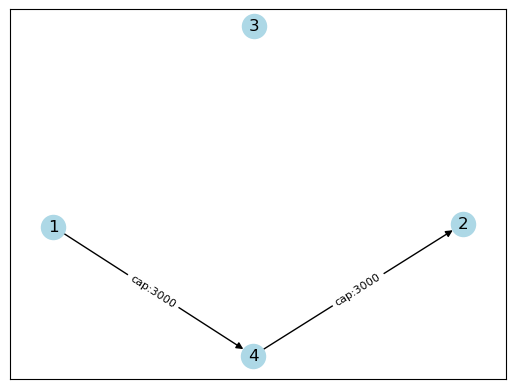

In [7]:
gnode = list(node['node_id'])
glink = list(zip(link['from_node_id'],link['to_node_id']))
G = nx.DiGraph()           # grapgh object
G.add_nodes_from(gnode)
G.add_edges_from(glink)
coordinates = np.array(list(zip(node['x_coord'],node['y_coord'])))
npos = dict(zip(gnode,coordinates))  # Get the mapping relationship between nodes and coordinates, represented as a dictionary
nlabels = dict(zip(gnode, gnode))

nx.draw_networkx_nodes(G, npos, node_color="lightblue")  # draw the nodes
nx.draw_networkx_edges(G, npos, glink)  # draw the edges(links)
nx.draw_networkx_labels(G, npos, nlabels)  # add labels
str_cap = ["cap:"+ str(i) for i in list(link['capacity'])]
edge_labels = dict(zip(glink, str_cap))

nx.draw_networkx_edge_labels(G, npos, edge_labels=edge_labels, font_size=8) # show the assignment flow result
plt.rcParams['figure.figsize']= (4, 3) 

## 2.The main programme
After preparing the data, you can run the DTA module of path4GMNS, which is called in a very simple way as shown below.

In [8]:
cd .\07_node_link_demand_multimodal\minimum_input

C:\Users\Lenovo\path4GMNS_tutorial\07_node_link_demand_multimodal\minimum_input


In [9]:
pg.dtaapi.run_DTALite()


DTALite run starts

DTALite run completes!


In [10]:
!cd

C:\Users\Lenovo\path4GMNS_tutorial\07_node_link_demand_multimodal\minimum_input


You can ensure that the program is running correctly by outputting a list of files in the current directory (the directory where pg.dtaapi.run_DTALite is running) and comparing it to the reference output provided by the DTA-user-guide documentation.

In [11]:
files = os.listdir('.')
files

['choice_set_output_0_25nb.csv',
 'demand.csv',
 'demand_file_list.csv',
 'demand_period.csv',
 'departure_time_profile.csv',
 'district_performance_s0_25nb.csv',
 'dynamic_traffic_management.csv',
 'final_summary.csv',
 'link.csv',
 'link_performance_s0_25nb.csv',
 'link_performance_summary.csv',
 'link_performance_summary_2way.csv',
 'link_type.csv',
 'log_DTA.txt',
 'log_label_correcting.txt',
 'log_main.txt',
 'log_scenario.txt',
 'log_shortest_path_tree.csv',
 'log_simulation.txt',
 'log_subarea_focusing.txt',
 'log_traffic_assignment.csv',
 'model_link.csv',
 'model_node.csv',
 'mode_type.csv',
 'node.csv',
 'od_performance_summary.csv',
 'route_assignment_s0_25nb.csv',
 'scenario_index_list.csv',
 'sensor_data.csv',
 'settings.csv',
 'subarea.csv',
 'system_performance_summary.csv',
 'zonal_hierarchy_mapping.csv']

## 3.Results
### a.Route assignment results
This result is output by the programme in route_assignment_[scenarioname].csv. This part presents the feasible routes between the OD pairs, the traffic assignment of each route after DTA, and other data such as route passing time.

In [12]:
route_assignment = pd.read_csv('route_assignment_s0_25nb.csv')
route_assignment

,first_column,route_seq_id,o_zone_id,d_zone_id,o_super_zone_index,d_super_zone_index,od_pair_key,information_type,mode_type,demand_period,...,sequential_link_delay,sequential_link_FFTT,DTM_OD_impact,DTM_path_impact,DTM_#_of_lane_closure_links,DTM_new_path_generated,DTM_volume_before,DTM_volume_after,DTM_volume_diff,
NaN,1,1,2,0,1,1->2,0,auto,am,70.0,...,15.000;15.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2,1,2,0,1,1->2,0,walk,am,7.0,...,15.000;15.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,3,1,2,0,1,1->2,0,bike,am,7.0,...,15.000;15.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def corr(route_df):
    # The original document has a line first_column, which will cause data misalignment merger
    # Here is to fix the problem of misalignment
    col=list(route_df.columns)
    col.remove('first_column')
    col.append('last')
    dic=dict(zip(list(route_df.columns),col))
    route=route_df.rename(columns=dic)
    return route

Corrected route result:

In [14]:
route = corr(route_assignment)
route

,route_seq_id,o_zone_id,d_zone_id,o_super_zone_index,d_super_zone_index,od_pair_key,information_type,mode_type,demand_period,volume,...,sequential_link_FFTT,DTM_OD_impact,DTM_path_impact,DTM_#_of_lane_closure_links,DTM_new_path_generated,DTM_volume_before,DTM_volume_after,DTM_volume_diff,,last
NaN,1,1,2,0,1,1->2,0,auto,am,70.0,...,15.000;15.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2,1,2,0,1,1->2,0,walk,am,7.0,...,15.000;15.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,3,1,2,0,1,1->2,0,bike,am,7.0,...,15.000;15.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
route[['route_seq_id','od_pair_key','mode_type','volume','travel_time','node_sequence','link_id_sequence','demand_period']]

,route_seq_id,od_pair_key,mode_type,volume,travel_time,node_sequence,link_id_sequence,demand_period
NaN,1,1->2,auto,70.0,30.0000,1;4;2;,3;4;,am
NaN,2,1->2,walk,7.0,180.0000,1;4;2;,3;4;,am
NaN,3,1->2,bike,7.0,72.0664,1;4;2;,3;4;,am


Since you have given different mode types in the input file, it have generated different assignment results for each mode. When analysing and using this part of the data, you need to extract these three modes separately.

In [19]:
route_auto=route[route['mode_type']=='auto']
route_auto[['route_seq_id','od_pair_key','mode_type','volume','travel_time','node_sequence','link_id_sequence','demand_period']]

,route_seq_id,od_pair_key,mode_type,volume,travel_time,node_sequence,link_id_sequence,demand_period
NaN,1,1->2,auto,70.0,30.0,1;4;2;,3;4;,am


In [20]:
route_bike=route[route['mode_type']=='bike']
route_bike[['route_seq_id','od_pair_key','mode_type','volume','travel_time','node_sequence','link_id_sequence','demand_period']]

,route_seq_id,od_pair_key,mode_type,volume,travel_time,node_sequence,link_id_sequence,demand_period
NaN,3,1->2,bike,7.0,72.0664,1;4;2;,3;4;,am


In [21]:
route_walk=route[route['mode_type']=='walk']
route_walk[['route_seq_id','od_pair_key','mode_type','volume','travel_time','node_sequence','link_id_sequence','demand_period']]

,route_seq_id,od_pair_key,mode_type,volume,travel_time,node_sequence,link_id_sequence,demand_period
NaN,2,1->2,walk,7.0,180.0,1;4;2;,3;4;,am


As you can see, with different mode, the final volume and travel_time are different, which is affected by you defination in mode_type.csv.

### b.Link assignment results
This result is output by the program in link_assignment_[scenarioname].csv, presenting the assignment on the link.

In [22]:
link_performance = pd.read_csv('link_performance_s0_25nb.csv')
link_performance

,link_seq_id,link_id,vdf_type,from_node_id,to_node_id,lanes,distance_km,distance_mile,fftt,meso_link_id,...,DTM_speed_before,DTM_speed_after,DTM_speed_diff,DTM_DoC_before,DTM_DoC_after,DTM_Doc_diff,DTM_P_before,DTM_P_after,DTM_P_diff,notes
0,1,3,bpr,1,4,1.0,15.0,9.322561,15.0,-1,...,60.0,60.0,0.0,0.028,0.028,0.0,0.006,0.006,0.0,period-based
1,2,4,bpr,4,2,1.0,15.0,9.322561,15.0,-1,...,60.0,60.0,0.0,0.028,0.028,0.0,0.006,0.006,0.0,period-based


In [23]:
link_performance[['link_id','from_node_id','to_node_id','volume']]

,link_id,from_node_id,to_node_id,volume
0,3,1,4,84.0
1,4,4,2,84.0


With the link_performance file and network files(link.csv and node.csv), you can use the following code to get the network with assignment flow result on link.

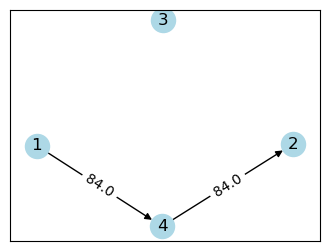

In [24]:
gnode = list(node['node_id'])
glink = list(zip(link['from_node_id'],link['to_node_id']))
G = nx.DiGraph()           # grapgh object
G.add_nodes_from(gnode)
G.add_edges_from(glink)

coordinates = np.array(list(zip(node['x_coord'],node['y_coord'])))
npos = dict(zip(gnode,coordinates))  # Get the mapping relationship between nodes and coordinates, represented as a dictionary
nlabels = dict(zip(gnode, gnode))
edge_labels = dict(zip(glink, list(link_performance['volume'])))

nx.draw_networkx_nodes(G, npos, node_color="lightblue")  # draw the nodes
nx.draw_networkx_edges(G, npos, glink)  # draw the edges(links)
nx.draw_networkx_labels(G, npos, nlabels)  # add labels
nx.draw_networkx_edge_labels(G, npos, edge_labels=edge_labels) # show the assignment flow result
plt.rcParams['figure.figsize']= (4, 3) 

### c.Summary of results
The program outputs various items such as runtime information, assignment results, and system performance to the final_summary.csv file, through which you can get the complete results of each part of the program.

In [25]:
col_names=[str(i) for i in range(13)]
data = pd.read_csv('final_summary.csv',header=None,names=col_names)

In [26]:
display(data.to_string()) # You can take this approach if you want to see the full table, but it's rather unintuitive

'                                                                                 0                                                                                                                                        1                                                    2                      3                                   4                   5                    6                    7                               8               9                 10                   11  12\n0                           [PROCESS INFO] Step 0: reading scenario_index_list.csv                                                                                                                                      NaN                                                  NaN                    NaN                                 NaN                 NaN                  NaN                  NaN                             NaN             NaN                NaN                  NaN NaN\n1                        